# Bharat Intern (House Price Prediction)
Task-1

Farhan M

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
housing_data = pd.read_csv("Calihousing.csv")
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#few missing data in total_bedrooms so will drop some values
housing_data.dropna(inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
X=housing_data.drop(['median_house_value'],axis=1)
y=housing_data['median_house_value']

In [13]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [14]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [10]:
train_dataset=X_train.join(y_train)

In [11]:
train_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3576,-118.53,34.25,20.0,6331.0,1537.0,2957.0,1509.0,3.3892,<1H OCEAN,323100.0
7993,-118.15,33.85,30.0,4071.0,1067.0,2144.0,970.0,2.7268,<1H OCEAN,218100.0
12784,-121.44,38.65,28.0,1219.0,240.0,559.0,212.0,3.8295,INLAND,122200.0
4939,-118.27,33.99,30.0,504.0,140.0,529.0,123.0,1.9531,<1H OCEAN,100000.0
3155,-118.44,35.13,34.0,1170.0,290.0,602.0,266.0,1.7917,INLAND,80000.0
...,...,...,...,...,...,...,...,...,...,...
12285,-116.89,33.86,2.0,6900.0,1238.0,1950.0,980.0,3.0417,INLAND,146300.0
13339,-117.66,34.03,14.0,2137.0,345.0,1151.0,352.0,5.7530,INLAND,185500.0
14923,-117.06,32.64,30.0,4494.0,667.0,1883.0,680.0,5.7660,NEAR OCEAN,186100.0
15868,-122.41,37.76,52.0,3452.0,784.0,2987.0,753.0,2.8135,NEAR BAY,260300.0


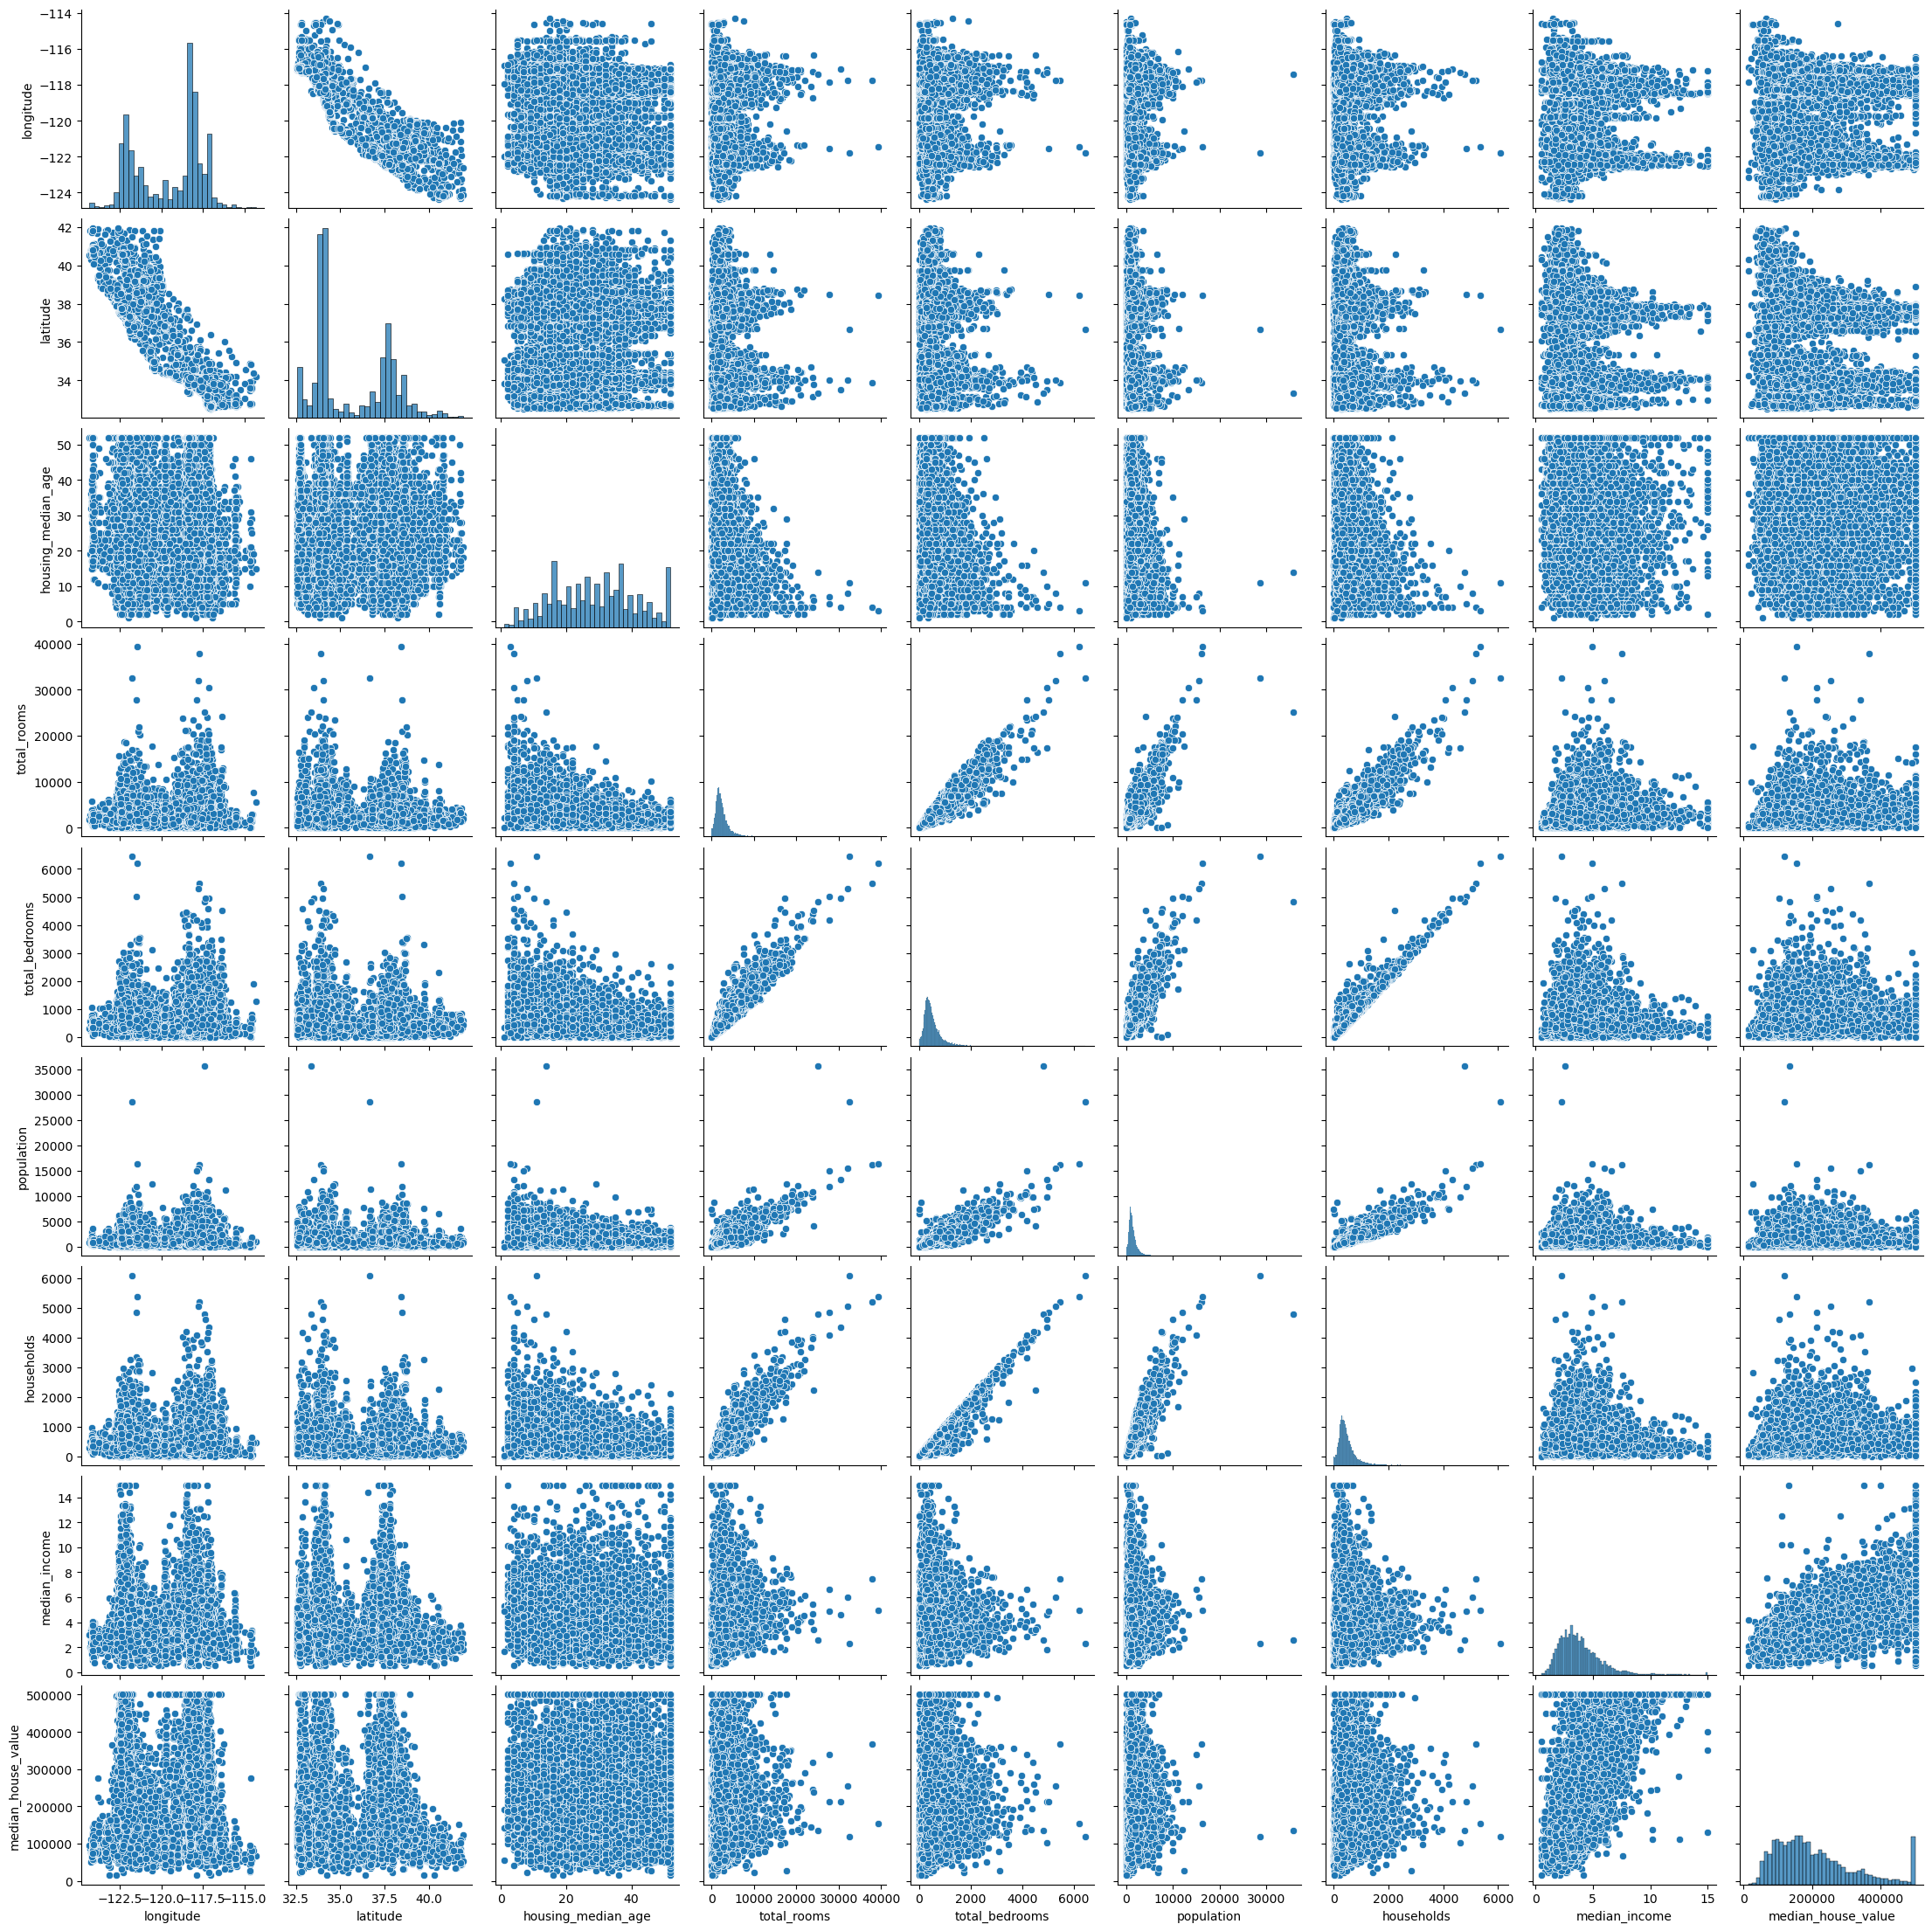

In [12]:
sns.pairplot(train_dataset)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

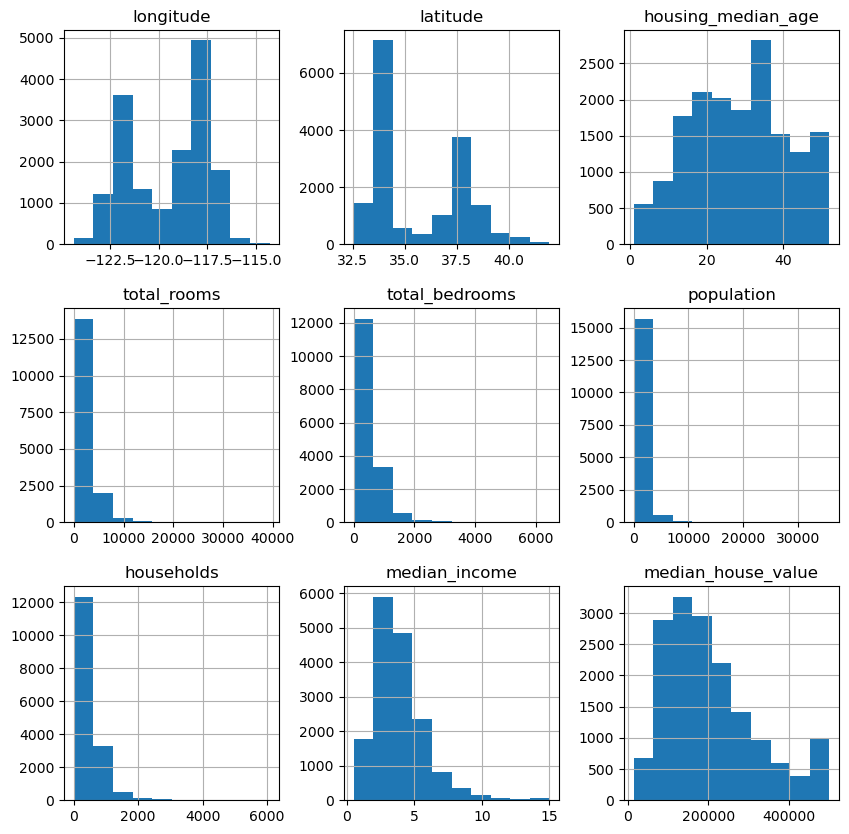

In [13]:
train_dataset.hist(figsize=(10,10))

In [14]:
train_dataset.corr()

C:\Users\Farhan\AppData\Local\Temp\ipykernel_11096\2043526507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_dataset.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924974,-0.111963,0.048550,0.075500,0.101401,0.061103,-0.021264,-0.046542
latitude,-0.924974,1.000000,0.011790,-0.037594,-0.070470,-0.108903,-0.074397,-0.074691,-0.143217
housing_median_age,-0.111963,0.011790,1.000000,-0.363924,-0.323074,-0.296316,-0.305474,-0.113817,0.106174
total_rooms,0.048550,-0.037594,-0.363924,1.000000,0.931591,0.857649,0.920959,0.193354,0.125704
total_bedrooms,0.075500,-0.070470,-0.323074,0.931591,1.000000,0.877198,0.979975,-0.011370,0.043294
population,0.101401,-0.108903,-0.296316,0.857649,0.877198,1.000000,0.906766,0.000959,-0.032519
households,0.061103,-0.074397,-0.305474,0.920959,0.979975,0.906766,1.000000,0.010332,0.058846
median_income,-0.021264,-0.074691,-0.113817,0.193354,-0.011370,0.000959,0.010332,1.000000,0.687644
median_house_value,-0.046542,-0.143217,0.106174,0.125704,0.043294,-0.032519,0.058846,0.687644,1.000000


C:\Users\Farhan\AppData\Local\Temp\ipykernel_11096\440627670.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_dataset.corr(),annot=True)


<Axes: >

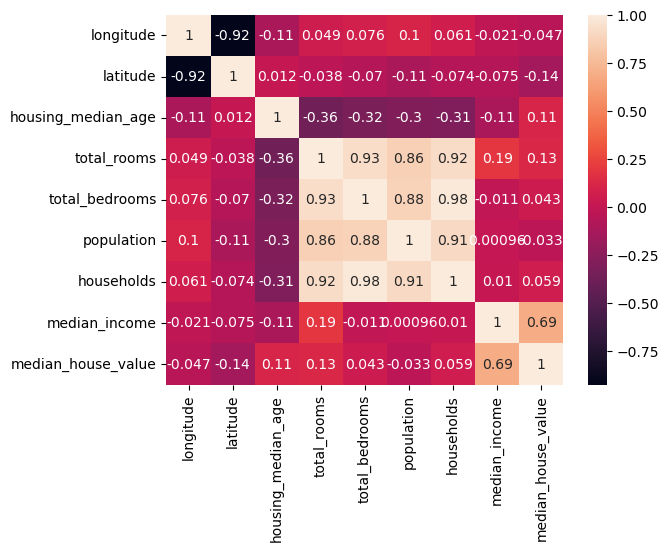

In [15]:
sns.heatmap(train_dataset.corr(),annot=True)

In [16]:
#as there in no normal distribution wew take log
#to prevent 0 values we add 1 at the end
train_dataset['total_rooms']=np.log(train_dataset['total_rooms']+1)
train_dataset['population']=np.log(train_dataset['population']+1)
train_dataset['total_bedrooms']=np.log(train_dataset['total_bedrooms']+1)
train_dataset['households']=np.log(train_dataset['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

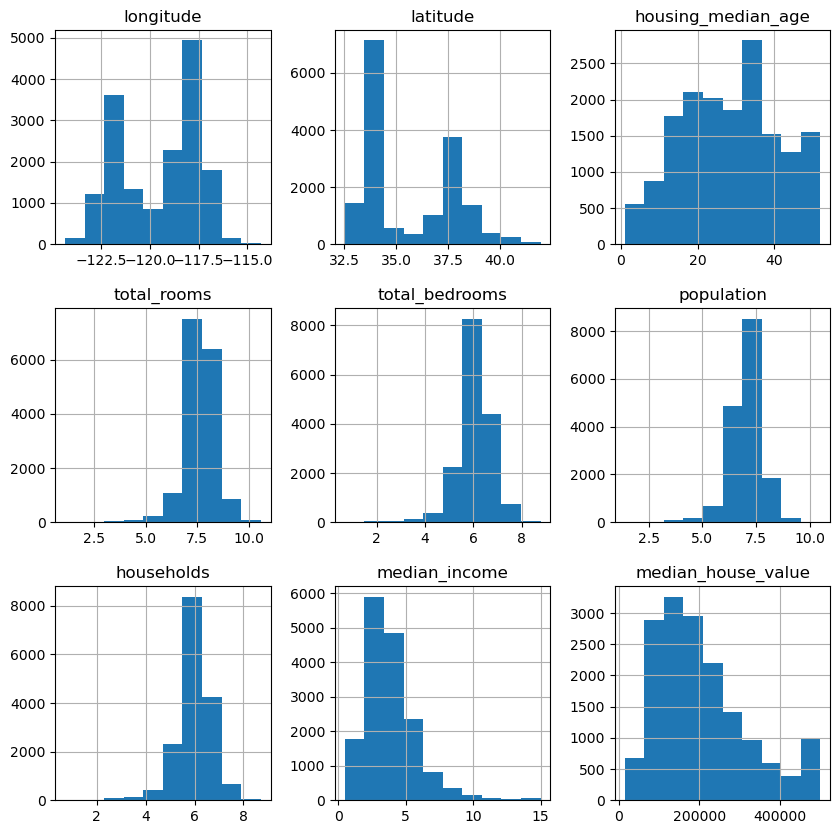

In [17]:
train_dataset.hist(figsize=(10,10))

In [18]:
#ocean proximity seems an important factor we have to change its type to someother for us to make use of it 
train_dataset.ocean_proximity.value_counts()

<1H OCEAN     7220
INLAND        5197
NEAR OCEAN    2115
NEAR BAY      1809
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
#encoding
train_dataset =train_dataset.join(pd.get_dummies(train_dataset.ocean_proximity)).drop(['ocean_proximity'],axis=1)
#this way we get binary values that is 0 and 1

<Axes: >

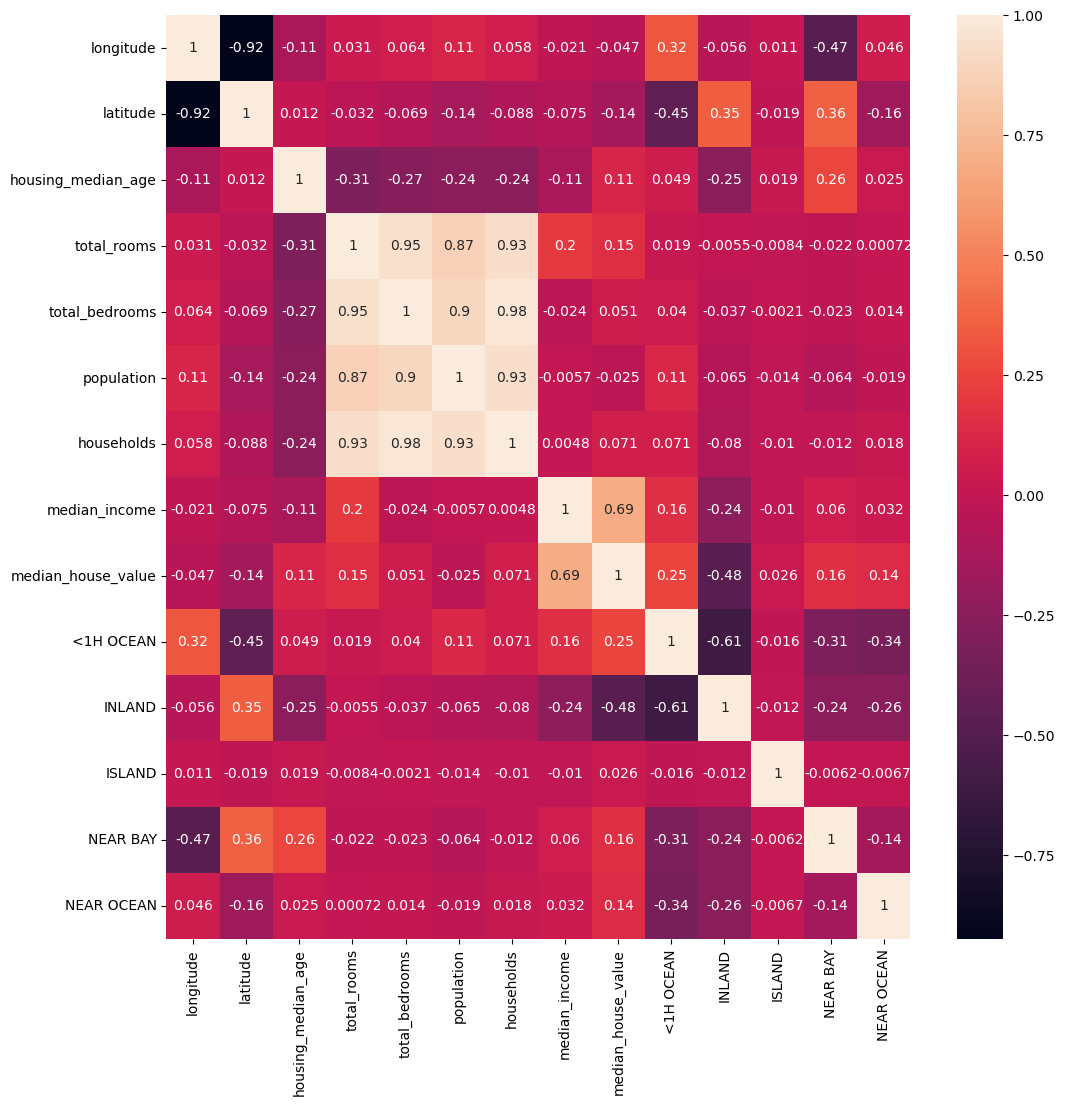

In [20]:
#checking correlation after changing the ocean proximity
plt.figure(figsize=(12, 12))
sns.heatmap(train_dataset.corr(),annot=True)

In [46]:
from sklearn.linear_model import LinearRegression

X_train,y_train = train_dataset.drop(['median_house_value'],axis=1),train_dataset['median_house_value']
reg=LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [37]:
test_dataset=X_test.join(y_test)

test_dataset['total_rooms']=np.log(test_dataset['total_rooms']+1)
test_dataset['population']=np.log(test_dataset['population']+1)
test_dataset['total_bedrooms']=np.log(test_dataset['total_bedrooms']+1)
test_dataset['households']=np.log(test_dataset['households']+1)

test_dataset =test_dataset.join(pd.get_dummies(test_dataset.ocean_proximity)).drop(['ocean_proximity'],axis=1)


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [38]:
test_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
16050,-122.48,37.76,48.0,2.168235,1.991450,2.098008,1.979659,3.2750,0,0,1,0,332100.0
4230,-118.29,34.11,48.0,2.113677,1.900668,2.018235,1.896564,3.2333,1,0,0,0,436400.0
6328,-117.92,33.98,10.0,2.370800,2.194926,2.312011,2.186787,6.1552,1,0,0,0,362500.0
9013,-118.67,34.16,17.0,2.371536,2.163253,2.275699,2.158565,9.1228,1,0,0,0,500001.0
12500,-121.46,38.57,52.0,2.053573,1.804211,1.932692,1.805236,3.2386,0,1,0,0,213200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9243,-120.06,36.98,12.0,2.186621,1.995531,2.134519,1.980731,1.4712,0,1,0,0,60400.0
1740,-122.34,37.97,19.0,2.164855,1.996705,2.112840,1.989729,2.3382,0,0,1,0,120700.0
10851,-117.90,33.66,22.0,2.217032,2.059853,2.149098,2.059853,3.1667,1,0,0,0,161000.0
6225,-117.93,34.05,32.0,2.199983,2.006353,2.146070,1.993147,4.2926,1,0,0,0,190700.0


In [24]:
X_test,y_test = test_dataset.drop(['median_house_value'],axis=1),test_dataset['median_house_value']

In [25]:
reg.score(X_train,y_train)

0.6698818155054127

In [40]:
reg.predict(X_train)

array([247211.98505337, 222604.69267571, 154928.11576795, ...,
       294774.73561517, 186934.26889316, 300437.68307278])

In [57]:
testingarray=np.array([-121,34.6,48.0,2,2,2,2,6.554,1,0,0,0,0])

In [58]:
testingarray=testingarray.reshape(1,-1)


In [59]:
reg.predict(testingarray)

C:\Users\Farhan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([572811.31297948])